In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
# 1. Veriyi Yükleme ve Hazırlama
file_path = "C:/Users/melisa/Desktop/hackathon/dataset.xlsx"
data = pd.read_excel(file_path)


In [3]:
# Convert TIME_STAMP to datetime format
data['TIME_STAMP'] = pd.to_datetime(data['TIME_STAMP'])


In [4]:
# Fill missing values with column mean
data['DOWNLOAD'].fillna(data['DOWNLOAD'].mean(), inplace=True)
data['UPLOAD'].fillna(data['UPLOAD'].mean(), inplace=True)


In [5]:
# Set TIME_STAMP as index
data.set_index('TIME_STAMP', inplace=True)

# Separate data into 'DOWNLOAD' and 'UPLOAD' series
download_series = data['DOWNLOAD']
upload_series = data['UPLOAD']

In [6]:
# ARIMA model training function
def train_arima(series, order=(5,1,0)):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# 2. ARIMA Modeli Eğitme ve Tahminleme
# Train ARIMA models for DOWNLOAD and UPLOAD series
download_model = train_arima(download_series)
upload_model = train_arima(upload_series)


C:\Users\melisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\melisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\melisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\melisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\melisa\anaconda3\lib\

In [7]:
# Forecasting (e.g., for the last 30 observations)
download_forecast = download_model.predict(start=len(download_series)-30, end=len(download_series)-1, dynamic=False)
upload_forecast = upload_model.predict(start=len(upload_series)-30, end=len(upload_series)-1, dynamic=False)


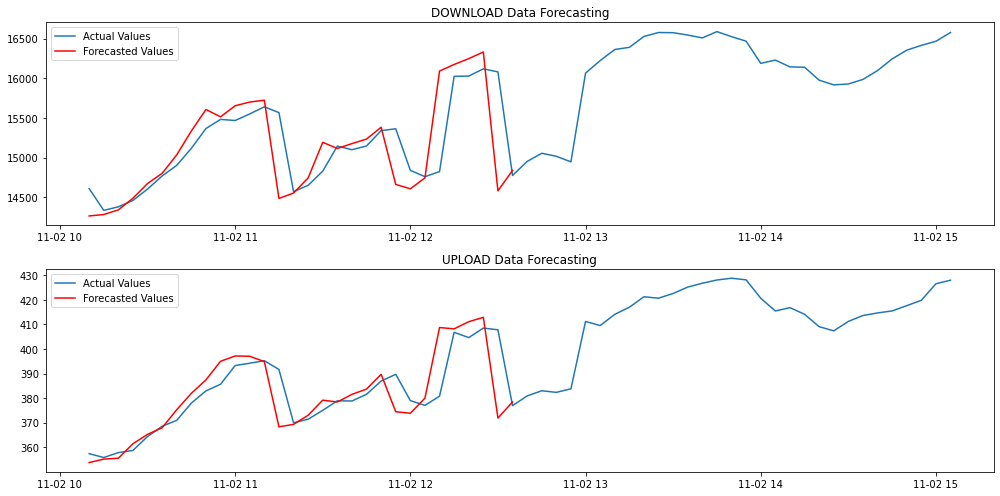

In [8]:
# 3. Tahmin Değerlerini Görselleştirme
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(download_series[-60:], label='Actual Values')
plt.plot(download_forecast, color='red', label='Forecasted Values')
plt.title('DOWNLOAD Data Forecasting')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(upload_series[-60:], label='Actual Values')
plt.plot(upload_forecast, color='red', label='Forecasted Values')
plt.title('UPLOAD Data Forecasting')
plt.legend()

plt.tight_layout()
plt.show()
